In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd

In [5]:
# AR(1) model: Y_t = c + φ*Y_{t-1} + ε_t
# where c = 0.1, φ = 0.99, ε_t ~ N(0, 0.5^2)

c = 0.1
phi = 0.99
sigma_epsilon = 0.5

# Unconditional mean: μ_Y = c / (1 - φ)
mu_Y = c / (1 - phi)
print(f"Unconditional mean μ_Y = c / (1 - φ) = {c} / (1 - {phi}) = {mu_Y:.6f}")

# Unconditional variance: σ_Y^2 = σ_ε^2 / (1 - φ^2)
sigma_Y_squared = (sigma_epsilon**2) / (1 - phi**2)
sigma_Y = np.sqrt(sigma_Y_squared)
print(f"Unconditional variance σ_Y^2 = σ_ε^2 / (1 - φ^2) = {sigma_epsilon**2} / (1 - {phi**2}) = {sigma_Y_squared:.6f}")
print(f"Unconditional standard deviation σ_Y = {sigma_Y:.6f}")

Unconditional mean μ_Y = c / (1 - φ) = 0.1 / (1 - 0.99) = 10.000000
Unconditional variance σ_Y^2 = σ_ε^2 / (1 - φ^2) = 0.25 / (1 - 0.9801) = 12.562814
Unconditional standard deviation σ_Y = 3.544406


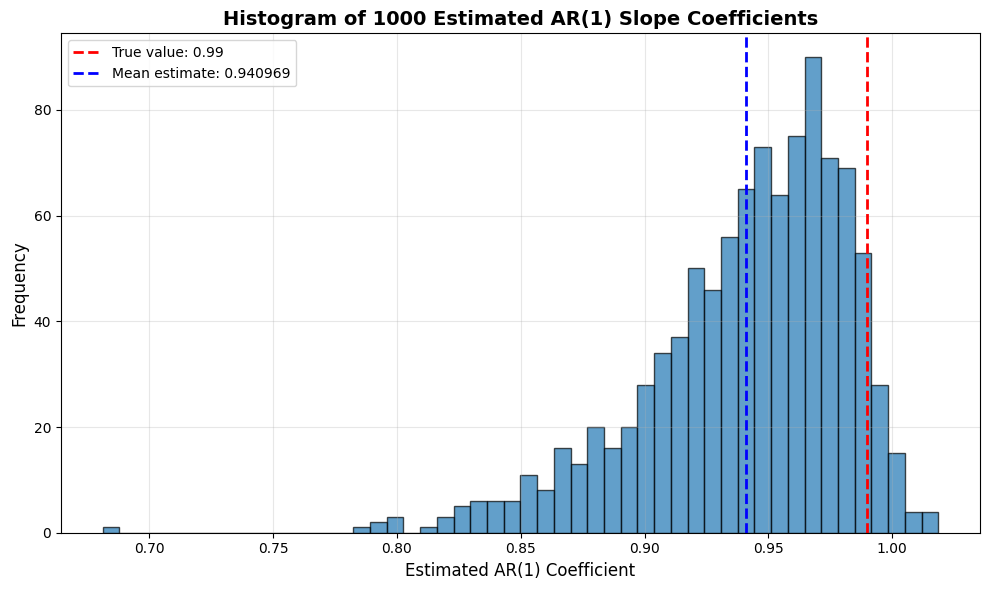


Simulation complete: 1000 realizations of 100 observations each
Mean of estimated coefficients: 0.940969
Standard deviation of estimates: 0.041234
Minimum estimate: 0.681128
Maximum estimate: 1.018596


In [6]:
# Part b: Simulation

np.random.seed(42)  # For reproducibility
n_obs = 100
n_simulations = 1000
estimated_coefficients = []

for sim in range(n_simulations):
    # Initialize Y_0 from N(μ_Y, σ_Y^2)
    Y = np.zeros(n_obs + 1)
    Y[0] = np.random.normal(mu_Y, sigma_Y)
    
    # Generate 100 observations
    for t in range(1, n_obs + 1):
        epsilon_t = np.random.normal(0, sigma_epsilon)
        Y[t] = c + phi * Y[t-1] + epsilon_t
    
    # Use observations 1 to 100 (drop Y_0)
    Y_data = Y[1:]
    
    # Estimate AR(1) by least squares
    ar_model = AutoReg(Y_data, lags=1, trend='c')
    ar_results = ar_model.fit()
    
    # Extract the slope coefficient (AR(1) coefficient)
    estimated_phi = ar_results.params[1]  # params[0] is constant, params[1] is AR(1) coeff
    estimated_coefficients.append(estimated_phi)

estimated_coefficients = np.array(estimated_coefficients)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(estimated_coefficients, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(phi, color='red', linestyle='--', linewidth=2, label=f'True value: {phi}')
plt.axvline(np.mean(estimated_coefficients), color='blue', linestyle='--', linewidth=2, 
            label=f'Mean estimate: {np.mean(estimated_coefficients):.6f}')
plt.xlabel('Estimated AR(1) Coefficient', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of 1000 Estimated AR(1) Slope Coefficients', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSimulation complete: {n_simulations} realizations of {n_obs} observations each")
print(f"Mean of estimated coefficients: {np.mean(estimated_coefficients):.6f}")
print(f"Standard deviation of estimates: {np.std(estimated_coefficients):.6f}")
print(f"Minimum estimate: {np.min(estimated_coefficients):.6f}")
print(f"Maximum estimate: {np.max(estimated_coefficients):.6f}")

In [12]:
true_value = phi
mean_estimate = np.mean(estimated_coefficients)
bias = mean_estimate - true_value
relative_bias = (bias / true_value) * 100

print(f"True AR(1) coefficient: {true_value}")
print(f"Mean of 1000 estimates: {mean_estimate:.6f}")
print(f"Bias: {bias:.6f}")
print(f"Relative bias: {relative_bias:.2f}%")

print(f"The least squares estimator shows downward bias.")

print(f"\nThis bias occurs because:")
print("1. In finite samples, the OLS estimator for AR models is biased downward")
print("2. The bias is more pronounced when φ is close to 1 (near unit root)")
print("3. The bias decreases as sample size increases, but persists in finite samples")

True AR(1) coefficient: 0.99
Mean of 1000 estimates: 0.940969
Bias: -0.049031
Relative bias: -4.95%
The least squares estimator shows downward bias.

This bias occurs because:
1. In finite samples, the OLS estimator for AR models is biased downward
2. The bias is more pronounced when φ is close to 1 (near unit root)
3. The bias decreases as sample size increases, but persists in finite samples
